## Imports

In [21]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## Select file

In [29]:
#######################################################
#### GUI 

edt_filename1 = widgets.Text(description = 'File name 1', value='Exp6_065_60')
edt_filename2 = widgets.Text(description = 'File name 2', value='Exp6_085_60')
edt_filename3 = widgets.Text(description = 'File name 3', value='Exp6_105_60')
#edt_filename1 = widgets.Text(description = 'File name 1', value='Exp6_gk2_60') 
#edt_filename2 = widgets.Text(description = 'File name 2', value='Exp6_gk20_60')  
#edt_filename3 = widgets.Text(description = 'File name 3', value=' Exp6_gk80_60') 


btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename1, edt_filename2,edt_filename3,btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    global file_name_arr, v_arr, ecl_arr, t_arr
    file_name_arr =[ ]
    file_name_arr.append("\\"+edt_filename1.value)
    file_name_arr.append("\\"+edt_filename2.value)
    file_name_arr.append("\\"+edt_filename3.value)
    #print(file_name_arr)
    
    v_arr = []
    ecl_arr = []
    
    for i in file_name_arr:
        file_name = i
        try: 
            with h5py.File(file_name, mode='r') as hdf:

                print(f" Loading file: {file_name}")
                
                C = hdf.get('COMPARTMENTS')
                C_group_arr =[]
                t_arr_bool = True
                comp_names_arr= list(C.keys())

                C1 = C.get(comp_names_arr[0])

                T = hdf.get('TIMING')
                total_t = T.get('TOTAL_T')[()]
                intervals = T.get('INTERVALS')[()]
                dt = T.get("DT")[()]


                total_steps = total_t /dt          
                interval_step = total_steps / intervals
                #interval_step =250000
                interval_arr = [round(interval_step * i) for i in range(intervals)]
               
                t_arr =[]   
                #na_arr = []
                #cl_arr = []
                #g_syn_arr = []
                v_arr_comp = []
                ecl_arr_comp= []
                ##### LOADING COMPARTMENT DATA
                for e in range(len(comp_names_arr)):
                    C_group = C.get(comp_names_arr[e])
                    C_group_arr.append(C_group)

                    v_temp_arr = []
                    ecl_temp_arr = []
                    #na_temp_arr = []
                    #cl_temp_arr =[]
                    #g_syn_temp_arr = []
                    for j in range(len(list(C_group.keys()))):
                        dataset = C_group.get(str(interval_arr[j]))
                        if comp_names_arr[e] == 'Comp4' or comp_names_arr[e] == 'Comp8':

                            v_temp_arr.append(dataset[-4]*1e3)
                            ecl_temp_arr.append(dataset[-2]*1e3)
                            #na_temp_arr.append(dataset[4]*1e3)
                            #cl_temp_arr.append(dataset[6]*1e3)
                            #g_syn_temp_arr.append(dataset[-1]*1e9)
                        else:
                            v_temp_arr.append(dataset[-3]*1e3)
                            ecl_temp_arr.append(dataset[-1]*1e3)
                            #na_temp_arr.append(dataset[4]*1e3)
                            #cl_temp_arr.append(dataset[6]*1e3)
                            #g_syn_temp_arr.append(dataset[-1]*1e9)
                        if t_arr_bool == True:
                            t_arr.append(dataset[0]*1e3)

                    v_arr_comp.append(v_temp_arr)
                    ecl_arr_comp.append(ecl_temp_arr)
                    #na_arr.append(na_temp_arr)
                    #cl_arr.append(cl_temp_arr)
                    #g_syn_arr.append(g_syn_temp_arr)
                    t_arr_bool = False

                v_arr.append(v_arr_comp)
                ecl_arr.append(ecl_arr_comp)


        except: 
            raise("File not found")
            raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='Exp6_065_60', description='File name 1')

Text(value='Exp6_085_60', description='File name 2')

Text(value='Exp6_105_60', description='File name 3')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

 Loading file: \Exp6_065_60
 Loading file: \Exp6_085_60
 Loading file: \Exp6_105_60


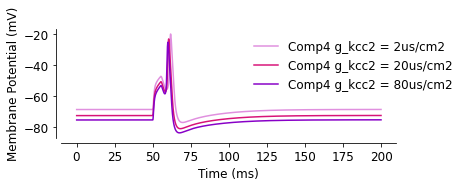

In [30]:
f6c, ax_1 = mplt.subplots(1,1, figsize=(6,2))

#z_arr = ['Comp4 z=-0.65','Comp4 z=-0.85','Comp4 z=-1.05']
z_arr = ['Comp4 g_kcc2 = 2us/cm2','Comp4 g_kcc2 = 20us/cm2','Comp4 g_kcc2 = 80us/cm2']
#color_arr = ['#F3DE02','#F78E12','#C70007']
color_arr = ['#E090DF','#D81378','#8800C7']

for i in range(len(v_arr)):
    ax_1.plot(t_arr[5:],v_arr[i][4][5:],label=z_arr[i],color=color_arr[i])
    
ax_1.legend(fontsize=12,loc='upper right',bbox_to_anchor=(1.2,1),frameon=False)

sns.despine(offset=5)
ax_1.set_xlabel("Time (ms)", fontsize=12)
ax_1.set_ylabel("Membrane Potential (mV)", fontsize=12)
ax_1.tick_params(axis='both', which='major', labelsize=12)

[[-83.45579753503746, -83.81700239253635, -84.68523606241968], [-83.44416986763983, -83.81677516508935, -84.71669942013686], [-83.42054595729695, -83.81631858672623, -84.78087023034708], [-83.38417871077165, -83.81562838730468, -84.88030287079975], [-83.33392283343781, -83.81469812234455, -85.01900370002119], [-83.26820543425762, -83.81351911810036, -85.20266082045642], [-83.36722673334474, -83.81208040003175, -84.89495494010497], [-83.45213520968795, -83.81036859921441, -84.63011096559659], [-83.5256892642094, -83.80836785498394, -84.39806763094263], [-83.54095859631377, -83.81110329180973, -84.36207231427727]]
[[10.9, 11.2, 12.0], [10.9, 11.2, 12.0], [10.9, 11.2, 12.0], [10.9, 11.2, 12.1], [10.8, 11.2, 12.3], [10.8, 11.2, 12.5], [10.9, 11.2, 12.2], [10.9, 11.2, 11.9], [11.0, 11.2, 11.7], [11.0, 11.2, 11.7]]


Text(98.17500000000001, 0.5, 'DF Cl (mV)')

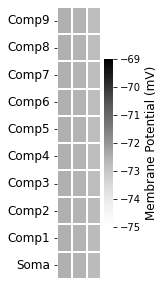

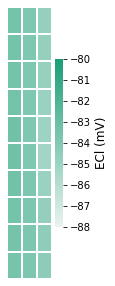

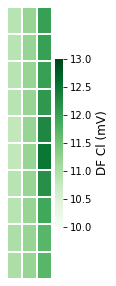

In [28]:
comp_names_arr = ["Soma", "Comp1", "Comp2", "Comp3", "Comp4", "Comp5", "Comp6","Comp7", "Comp8", "Comp9"]
#############################################
f6_vm, ax_vm = mplt.subplots(1,1, figsize=(1,5))
v_heat_arr = []

for c in range(len(v_arr[1])):
    temp_arr = []
    temp_arr.append(v_arr[0][c][1250])
    temp_arr.append(v_arr[1][c][1250])
    temp_arr.append(v_arr[2][c][1250])
    v_heat_arr.append(temp_arr)
    
v_heat_arr.reverse()
g = sns.heatmap(v_heat_arr,cmap='Greys', xticklabels=False,vmin=-75,vmax=-69,yticklabels=True, annot=False, ax=ax_vm,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.10 )

g.set_yticklabels(comp_names_arr[::-1], fontsize=12, rotation=0)
cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=12)   
#############################################
f6_ecl, ax_ecl = mplt.subplots(1,1, figsize=(1,5))
ecl_heat_arr = []

for c in range(len(ecl_arr[1])):
    temp_arr = []
    temp_arr.append(ecl_arr[0][c][1250])
    temp_arr.append(ecl_arr[1][c][1250])
    temp_arr.append(ecl_arr[2][c][1250])
    ecl_heat_arr.append(temp_arr)
    
ecl_heat_arr.reverse()
g = sns.heatmap(ecl_heat_arr,cmap=cl_cmap, vmin=-88, vmax=-80,xticklabels=False,yticklabels=False, annot=False, ax=ax_ecl,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.10 )

cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('ECl (mV)',fontsize=12)  
print(ecl_heat_arr)

##############################################

#############################################
f6_dfcl, ax_dfcl = mplt.subplots(1,1, figsize=(1,5))
dfcl_heat_arr = []

for c in range(len(ecl_arr[1])):
    temp_arr = []
    temp_arr.append(round(v_arr[0][c][1250]-ecl_arr[0][c][1250],1))
    temp_arr.append(round(v_arr[1][c][1250]-ecl_arr[1][c][1250],1))
    temp_arr.append(round(v_arr[2][c][1250]-ecl_arr[2][c][1250],1))
    dfcl_heat_arr.append(temp_arr)
    
dfcl_heat_arr.reverse()
print(dfcl_heat_arr)
g = sns.heatmap(dfcl_heat_arr,cmap="Greens",vmin=10, vmax=13,xticklabels=False,yticklabels=False, annot=False, ax=ax_dfcl,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.10 )

cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('DF Cl (mV)',fontsize=12)


# Figure 6a - gNMDA vs gGABA

ValueError: x and y must have same first dimension, but have shapes (9995,) and (5, 10000)

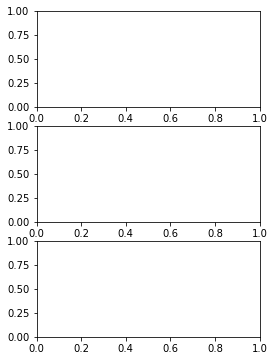

In [23]:
f6a, [ax_1,ax_2,ax_3] = mplt.subplots(3,1, figsize=(4,6))

t2_arr = [t_arr[i]*1e3 for i in range(len(t_arr))]


ax_3.plot(t2_arr[5:],v_arr[0][5:], label=comp_names_arr[0],color='#011f4b')
ax_2.plot(t2_arr[5:],v_arr[4][5:], label=comp_names_arr[4],color='#005b96')
ax_1.plot(t2_arr[5:],v_arr[8][5:], label=comp_names_arr[8],color='#6497b1')


ax_2.set_ylabel("Membrane Potential (mV)", fontsize =14)
ax_3.set_xlabel("Simulation time (ms)", fontsize =14)
ax_3.tick_params(axis='y', which='major', labelsize=10)
ax_2.tick_params(axis='y', which='major', labelsize=10)
ax_1.tick_params(axis='y', which='major', labelsize=10)
ax_1.legend(fontsize=10,frameon=False)
ax_1.xaxis.set_ticks([])
ax_2.xaxis.set_ticks([])
sns.despine(ax=ax_1,bottom=True,offset=5)
sns.despine(ax=ax_2,bottom=True,offset=5)
sns.despine(ax=ax_3,bottom=False,offset=5)
ax_2.legend(fontsize=10,frameon=False)
ax_3.legend(fontsize=10,frameon=False)

#########################################################
#########################################################

f6a2, [ax_vm,ax_ecl] = mplt.subplots(2,1, figsize=(6,2))
cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
vm_heat_arr = [v_arr[4][::]]
ecl_heat_arr = [ecl_arr[4][::]]
g = sns.heatmap(vm_heat_arr,cmap='Greys',vmin=-80,vmax=-20, xticklabels=False,yticklabels=True, annot=False, ax=ax_vm,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.00 )

g.set_yticklabels(['Comp4 Vm'], fontsize=12, rotation=0)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('mV',fontsize=12)

g2 = sns.heatmap(ecl_heat_arr,cmap=cl_cmap,vmin=-100,vmax=-70,xticklabels=False,yticklabels=True, annot=False, ax = ax_ecl,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.00 )
g2.set_yticklabels(['Comp4 ECl'], fontsize=12, rotation=0)
cbar2 = g2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=8)
cbar2.ax.set_ylabel('mV',fontsize=12)

In [22]:
print(len(na_arr))
mplt.plot(t2_arr,na_arr[8][:])
mplt.plot(t2_arr,cl_arr[4][:])
#delta_na_arr = [na_arr[8][1900 + i] - na_arr[8][1899+i] for i in range(2200)]
#delta_cl_arr = [cl_arr[4][1900 + i] - cl_arr[4][1899+i] for i in range(2200)]
#na_heat_arr = [delta_na_arr[::50]]
#cl_heat_arr = [delta_cl_arr[::50]]
g_GABA_heat_arr = [g_syn_arr[4][1800:6000:1]]
g_NMDA_heat_arr = [g_syn_arr[8][1800:6000:1]]
cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)

f6_heat, [ax_na,ax_cl] = mplt.subplots(2,1, figsize=(5,1.5))

g = sns.heatmap(g_NMDA_heat_arr,cmap='Reds',xticklabels=False,yticklabels=True, annot=False, ax=ax_na,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.00 )
g.set_yticklabels(['g_NMDA'], fontsize=12, rotation=0)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('nS',fontsize=12)

g2 = sns.heatmap(g_GABA_heat_arr,cmap='Greens',xticklabels=False,yticklabels=True, annot=False, ax = ax_cl,
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, linewidth=0.00 )
g2.set_yticklabels(['g_GABA'], fontsize=12, rotation=0)
cbar2 = g2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=8)
cbar2.ax.set_ylabel('nS',fontsize=12)

10


NameError: name 't2_arr' is not defined

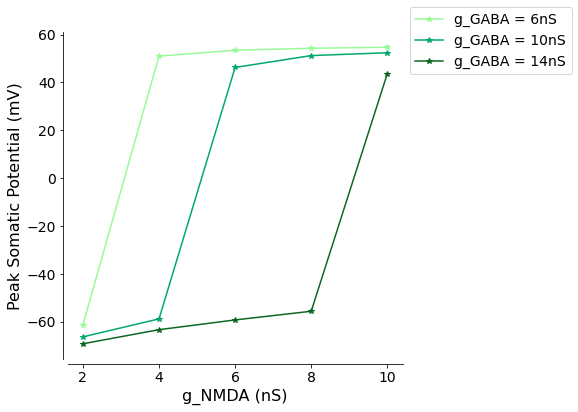

In [23]:
g_exc = [2, 4,6,8,10]
g_inh = ['g_GABA = 6nS','g_GABA = 10nS','g_GABA = 14nS']


peak_soma_v_arr_6 = []
peak_soma_v_arr_6.append(round(-61.32917487472832,2))
peak_soma_v_arr_6.append(round(50.97113245829445,2))
peak_soma_v_arr_6.append(round(53.42404222791133,2))
peak_soma_v_arr_6.append(round(54.252322980564585,2))
peak_soma_v_arr_6.append(round(54.670624942883215,2))

peak_soma_v_arr_10 = []
peak_soma_v_arr_10.append(round(-66.3911486414515,2))
peak_soma_v_arr_10.append(round(-58.89035039395331,2))
peak_soma_v_arr_10.append(round(46.2312986297941,2))
peak_soma_v_arr_10.append(round(51.19003568689153,2))
peak_soma_v_arr_10.append(round(52.37457774212487,2))

peak_soma_v_arr_14 = []
peak_soma_v_arr_14.append(round(-69.28727110554038,2))
peak_soma_v_arr_14.append(round(-63.40091833880118,2))
peak_soma_v_arr_14.append(round(-59.31854372251243,2))
peak_soma_v_arr_14.append(round(-55.69541357433658,2))
peak_soma_v_arr_14.append(round(43.58125188033408,2))



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,6))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_6,"*-", label =g_inh[0],color='#98FB98')
ax_1.plot(g_exc,peak_soma_v_arr_10,"*-", label =g_inh[1],color= '#00A86B')
ax_1.plot(g_exc,peak_soma_v_arr_14,"*-", label =g_inh[2], color = '#0b6623')




ax_1.set_ylabel("Peak Somatic Potential (mV)", fontsize=16)
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=14)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =14, bbox_to_anchor =(1,1.1),loc='upper left')





# Figure 6b : z differences

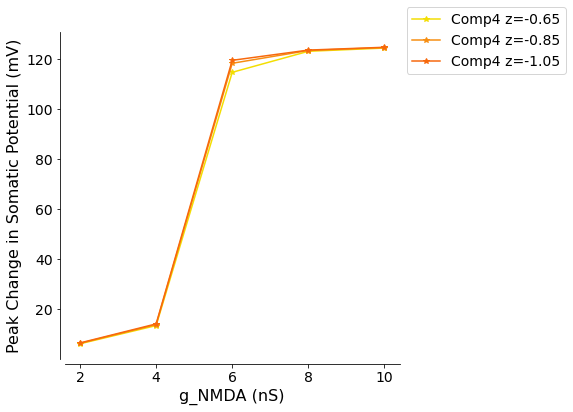

In [70]:
g_exc = ['2','4','6','8','10']
z_arr = ['Comp4 z=-0.65','Comp4 z=-0.85','Comp4 z=-1.05']


peak_soma_v_arr_z1 = []
peak_soma_v_arr_z1.append(round(5.96951,2))
peak_soma_v_arr_z1.append(round(13.25596,2))
peak_soma_v_arr_z1.append(round(114.72923,2))
peak_soma_v_arr_z1.append(round(123.14631,2))
peak_soma_v_arr_z1.append(round(124.45274,2))
#peak_soma_v_arr_z1.append(round(15.970168652566793,2))

peak_soma_v_arr_z2 = []
peak_soma_v_arr_z2.append(round(6.15975,2))
peak_soma_v_arr_z2.append(round(13.64238,2))
peak_soma_v_arr_z2.append(round(118.34569,2))
peak_soma_v_arr_z2.append(round(123.467773,2))
peak_soma_v_arr_z2.append(round(124.65077,2))

peak_soma_v_arr_z3 = []
peak_soma_v_arr_z3.append(round(6.30855,2))
peak_soma_v_arr_z3.append(round(13.94379,2))
peak_soma_v_arr_z3.append(round(119.54231,2))
peak_soma_v_arr_z3.append(round(123.63596,2))
peak_soma_v_arr_z3.append(round(124.76548,2))



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,6))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_z1,"*-", label =z_arr[0],color='#F3DE02')
ax_1.plot(g_exc,peak_soma_v_arr_z2,"*-", label =z_arr[1],color= '#F78E12')
ax_1.plot(g_exc,peak_soma_v_arr_z3,"*-", label =z_arr[2], color = '#F7680C')




ax_1.set_ylabel("Peak Change in Somatic Potential (mV)", fontsize=16)
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=14)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =14, bbox_to_anchor=(1,1.1),loc='upper left')

# Figure 6c : g_KCC2 differences